## import ##

In [1]:
from PIL import Image
import matplotlib.pyplot as plt 
import cv2
import numpy as np

from openslide import OpenSlide
from matplotlib.collections import LineCollection

from pyclustering.cluster.gmeans import gmeans
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

In [2]:
import warnings
np.warnings = warnings

In [3]:
import sys
sys.path.append("/workspace/segmantation/RGB_thresh_model/")
import region_extraction as re

## Files ##

In [4]:
path_1 = "/workspace/2024_05_27__1138-04.tif"
wsi = OpenSlide(path_1)
patch_size=512

In [5]:
wsi_test1 = wsi.read_region(location=(35100, 43100), level=0, size=(patch_size,patch_size)).convert("RGB")
wsi_test2 = wsi.read_region(location=(36100, 53100), level=0, size=(patch_size,patch_size)).convert("RGB")
wsi_test3 = wsi.read_region(location=(37000, 58900), level=0, size=(patch_size,patch_size)).convert("RGB")
wsi_test4 = wsi.read_region(location=(25100, 33100), level=0, size=(patch_size,patch_size)).convert("RGB")
wsi_test5 = wsi.read_region(location=(25200, 43100), level=0, size=(patch_size,patch_size)).convert("RGB")
wsi_test6 = wsi.read_region(location=(26200, 30000), level=0, size=(patch_size,patch_size)).convert("RGB")
wsi_test7 = wsi.read_region(location=(26200, 30000), level=0, size=(256, 256)).convert("RGB")

## WBC detection ##

(512, 512, 3)
OHTSU Thresh : 193.0


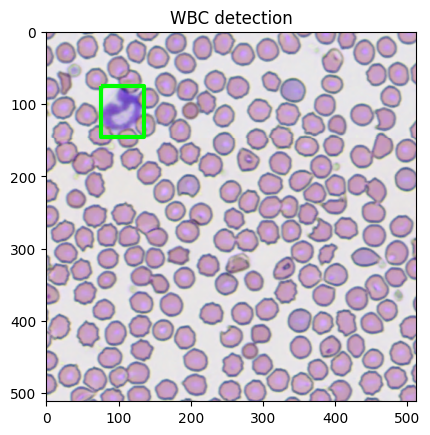

(512, 512, 3)
OHTSU Thresh : 194.0


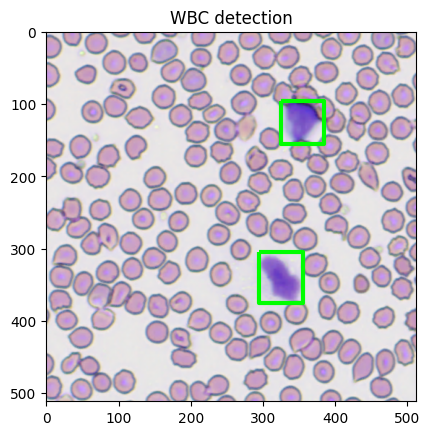

(512, 512, 3)
OHTSU Thresh : 196.0


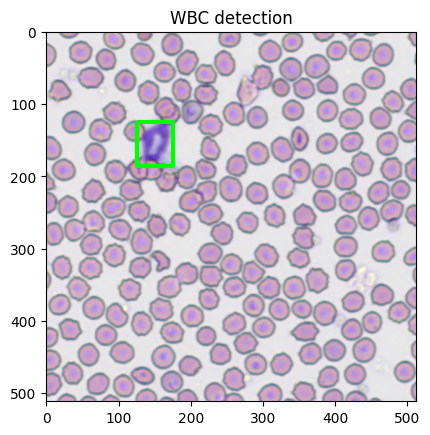

(512, 512, 3)
OHTSU Thresh : 188.0


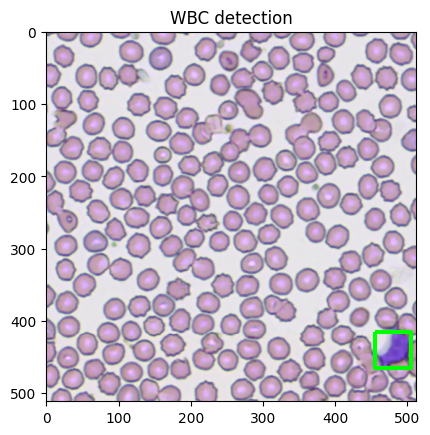

(512, 512, 3)
OHTSU Thresh : 185.0


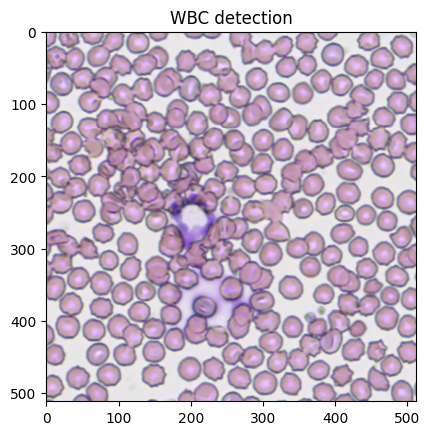

(512, 512, 3)
OHTSU Thresh : 187.0


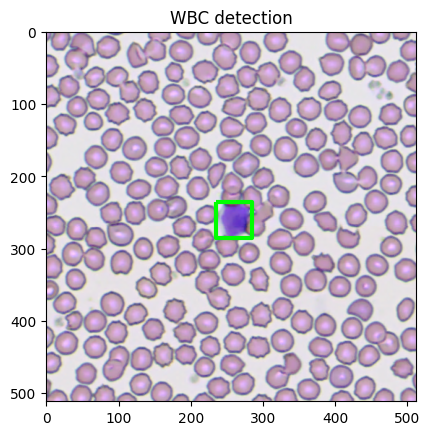

(256, 256, 3)
OHTSU Thresh : 188.0


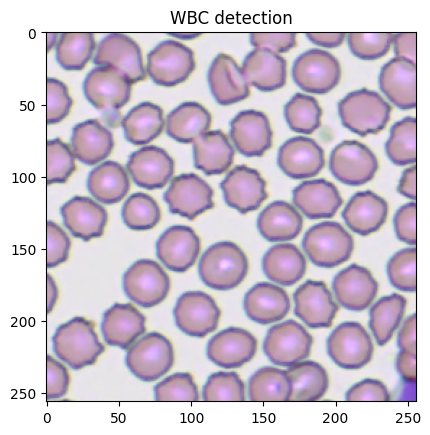

In [6]:
for wsi_test in [wsi_test1, wsi_test2, wsi_test3, wsi_test4, wsi_test5, wsi_test6, wsi_test7]:
    re.pickup_wbc_thresh(wsi_test, size=10, blue_thresh=175)

## RBC & WBC detection ##

(256, 256, 3)
OHTSU Thresh : 192.0


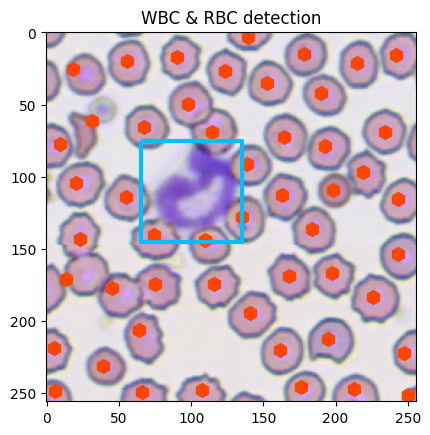

(512, 512, 3)
OHTSU Thresh : 194.0


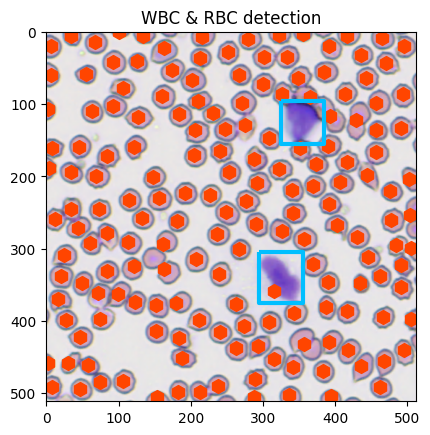

In [8]:
wsi_test_r1 = wsi.read_region(location=(35100, 43100), level=0, size=(256, 256)).convert("RGB")
wsi_test_r2 = wsi.read_region(location=(36100, 53100), level=0, size=(patch_size,patch_size)).convert("RGB")
for wsi_test in [wsi_test_r1, wsi_test_r2]:
    re.pickup_wbc_rbc_thresh(wsi_test, wbc_patch=10, rbc_patch=4, blue_thresh=175, red_thresh=150)